In [1]:
import netCDF4 as nc
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import cmocean as cmo
import os,sys,fnmatch,time
import numpy as np
import matplotlib.gridspec as gridspec
import matplotlib.patches as patches
from matplotlib.ticker import MultipleLocator
from matplotlib.colors import LinearSegmentedColormap
from matplotlib import animation
from salishsea_tools.nc_tools import scDataset
from matplotlib import ticker
from matplotlib import colors
import matplotlib as mpl
from matplotlib.colors import LinearSegmentedColormap

import sys
sys.path.append('/ocean/imachuca/Canyons/analysis_mackenzie_canyon/notebooks/general_circulation/')
import general_functions
import quicklook

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [2]:
import importlib
importlib.reload(quicklook)

<module 'quicklook' from '/ocean/imachuca/Canyons/analysis_mackenzie_canyon/notebooks/general_circulation/quicklook.py'>

In [3]:
dirname='/ocean/imachuca/Canyons/results_mackenzie/initial_collection/real_half/'
fname = "1_MCKNZ_1h_20170101_20170120_*"

min unsmoothed:  -0.131826929233
min smoothed:  -0.130884607414


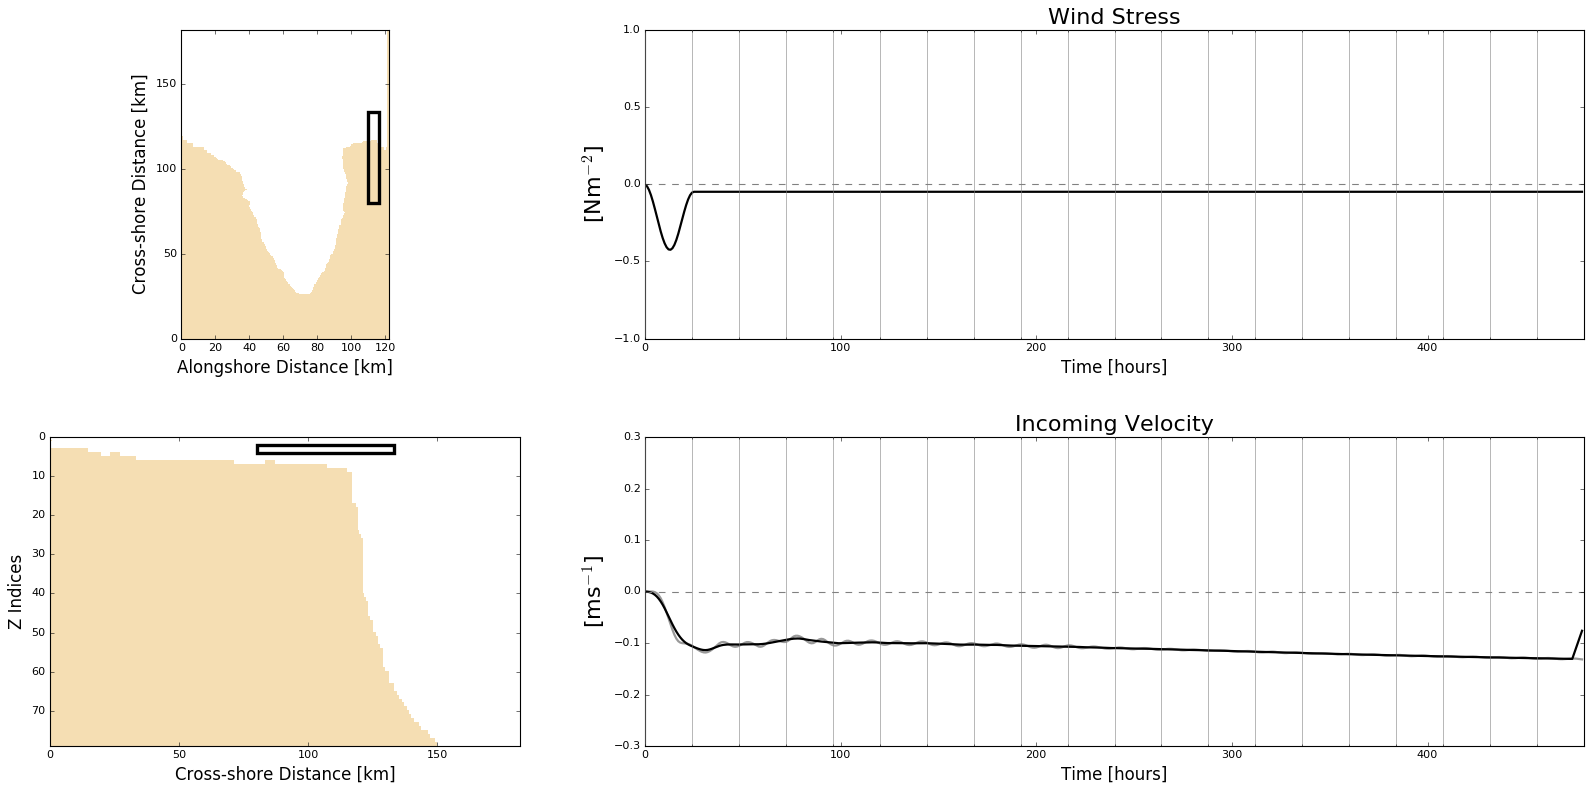

In [4]:
x_start = 165
x_end = 175
y_start = 120
y_end = 200
dep_start = 2
dep_end = 4
dep_break = 9

vozocrtx, umask, umask_all, depthu, sozotaux = quicklook.get_vars_for_box(dirname, fname, x_start, x_end, y_start, y_end)

avgU_all_ys, avgU_all_depths, avgU_box_depths, avgU_absolute = quicklook.calculate_avgU(vozocrtx, dep_start, dep_end)

fig = quicklook.plot_incoming_velocity(umask_all, y_start, y_end, x_start, x_end, dep_start, dep_end, avgU_absolute, sozotaux)

In [5]:
dep_ind = 9
vozocrtx, vomecrty, vovecrtz, vosaline, vosaline_orig, umask, vmask, tmask, depthu, sozotaux = quicklook.get_vars_at_depth(dirname, fname, dep_ind)

files
U
V
W
S


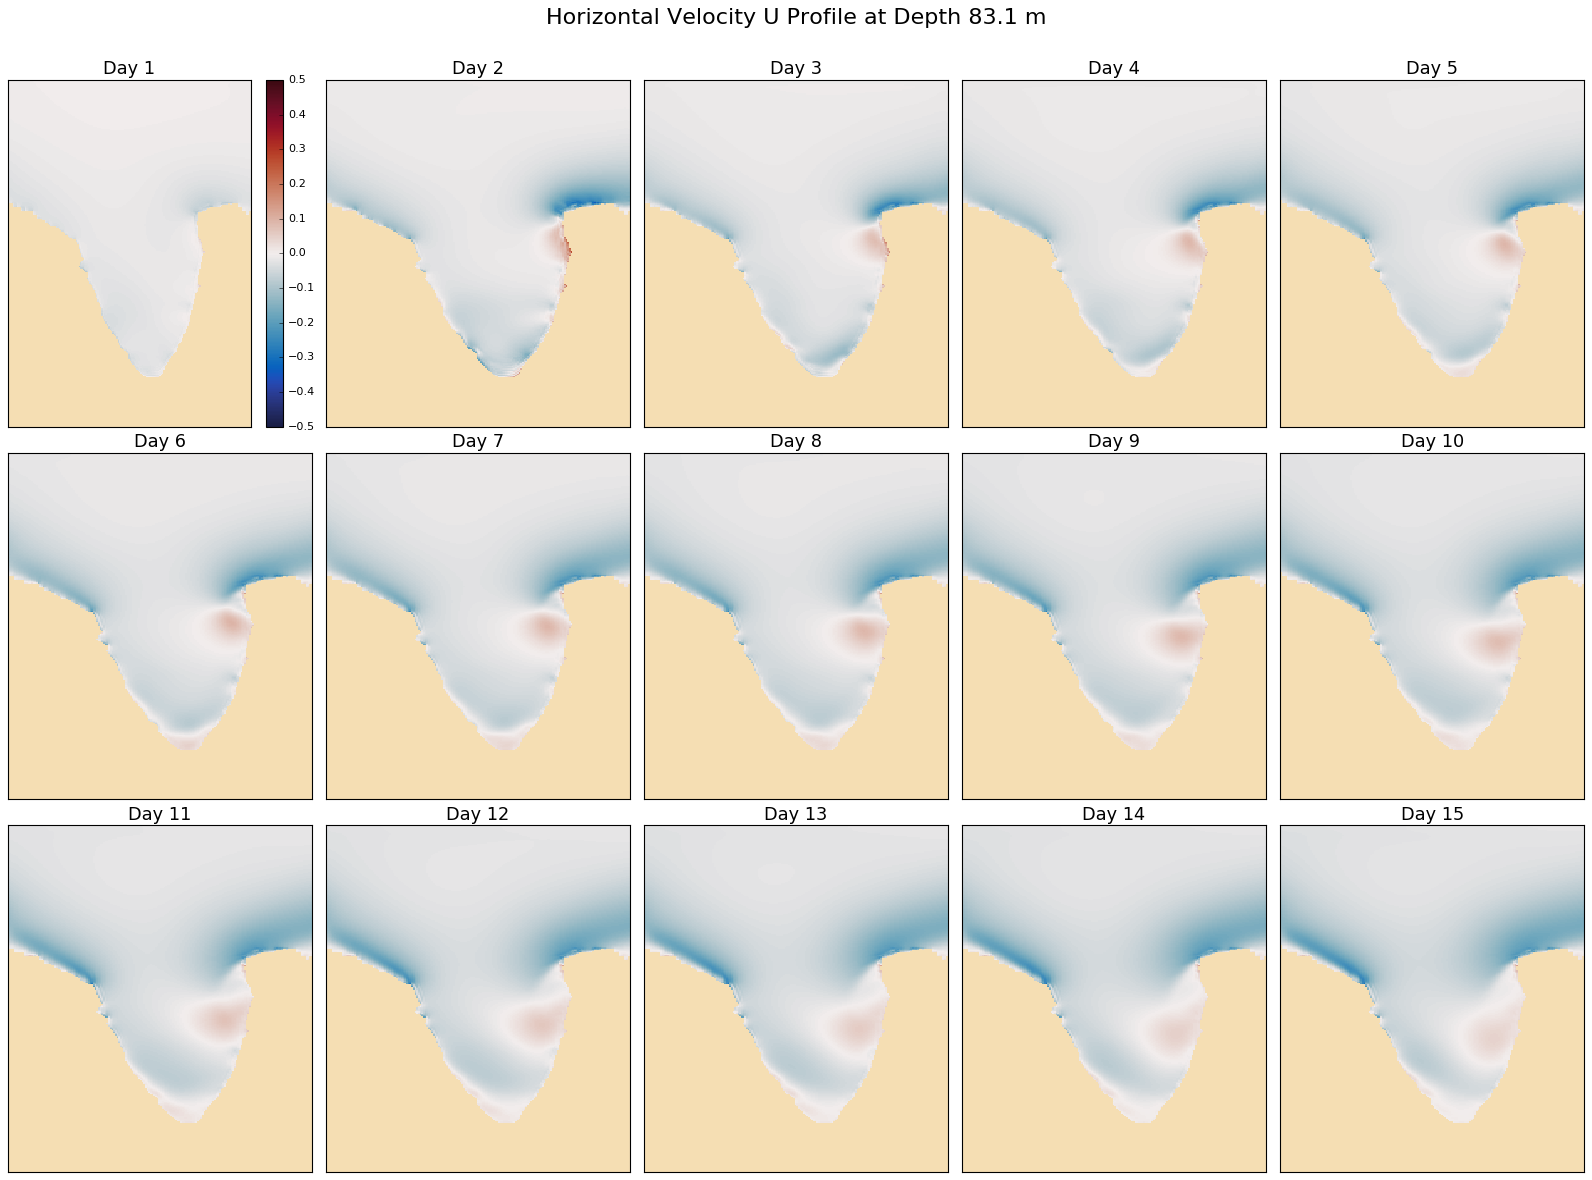

In [6]:
fig = quicklook.plot_vel_snapshots_depth(vozocrtx, depthu, dep_ind, 0.5, 'Horizontal Velocity U')

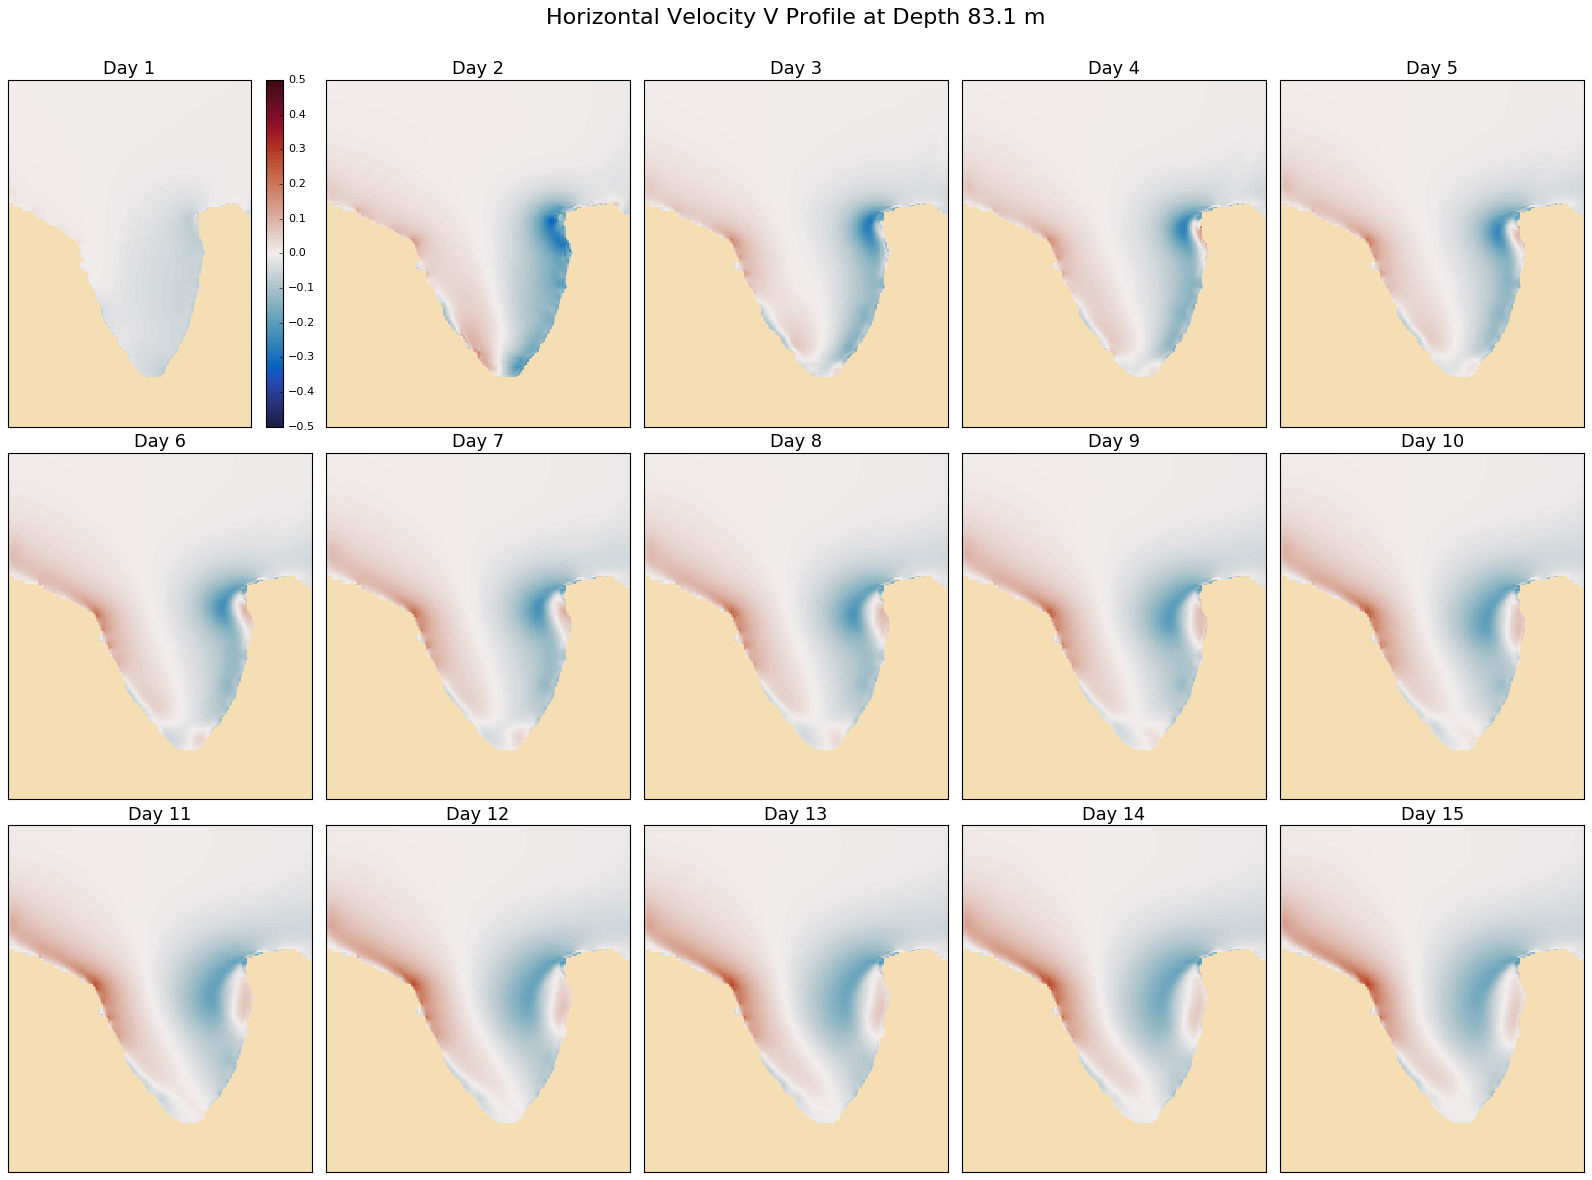

In [7]:
fig = quicklook.plot_vel_snapshots_depth(vomecrty, depthu, dep_ind, 0.5, 'Horizontal Velocity V')

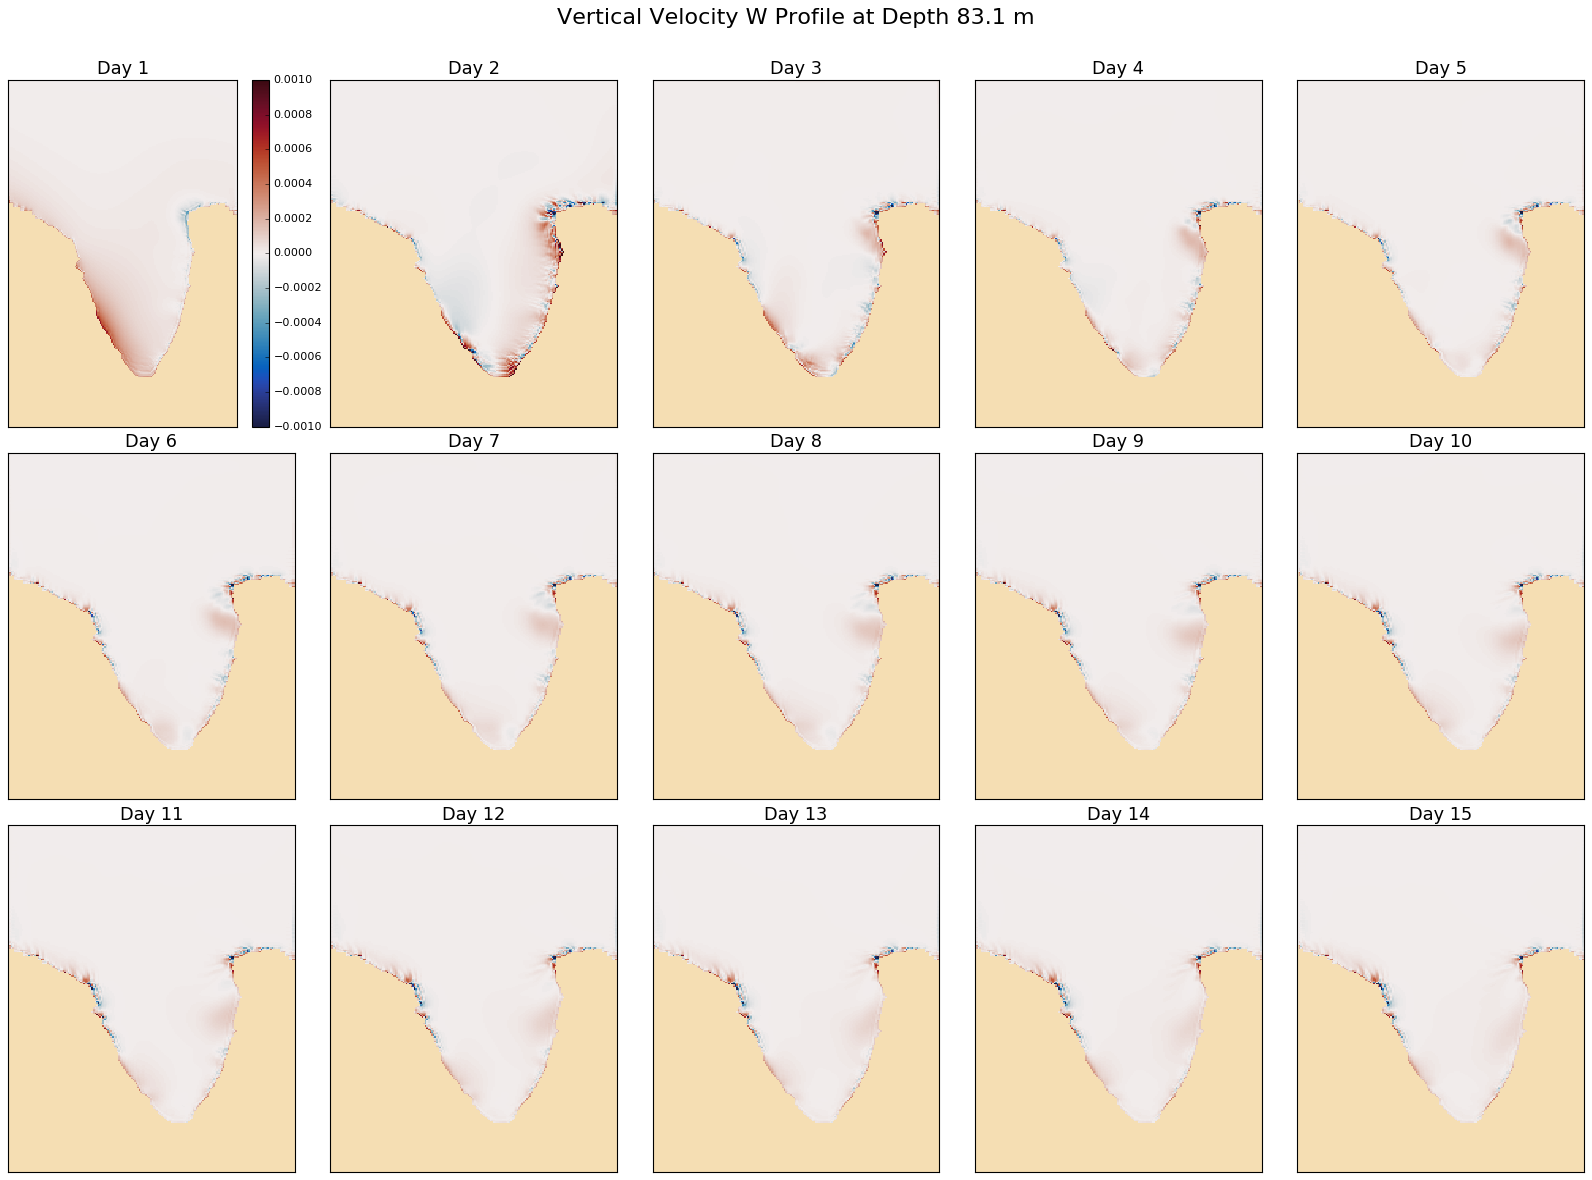

In [8]:
fig = quicklook.plot_vel_snapshots_depth(vovecrtz, depthu, dep_ind, 0.001, 'Vertical Velocity W')

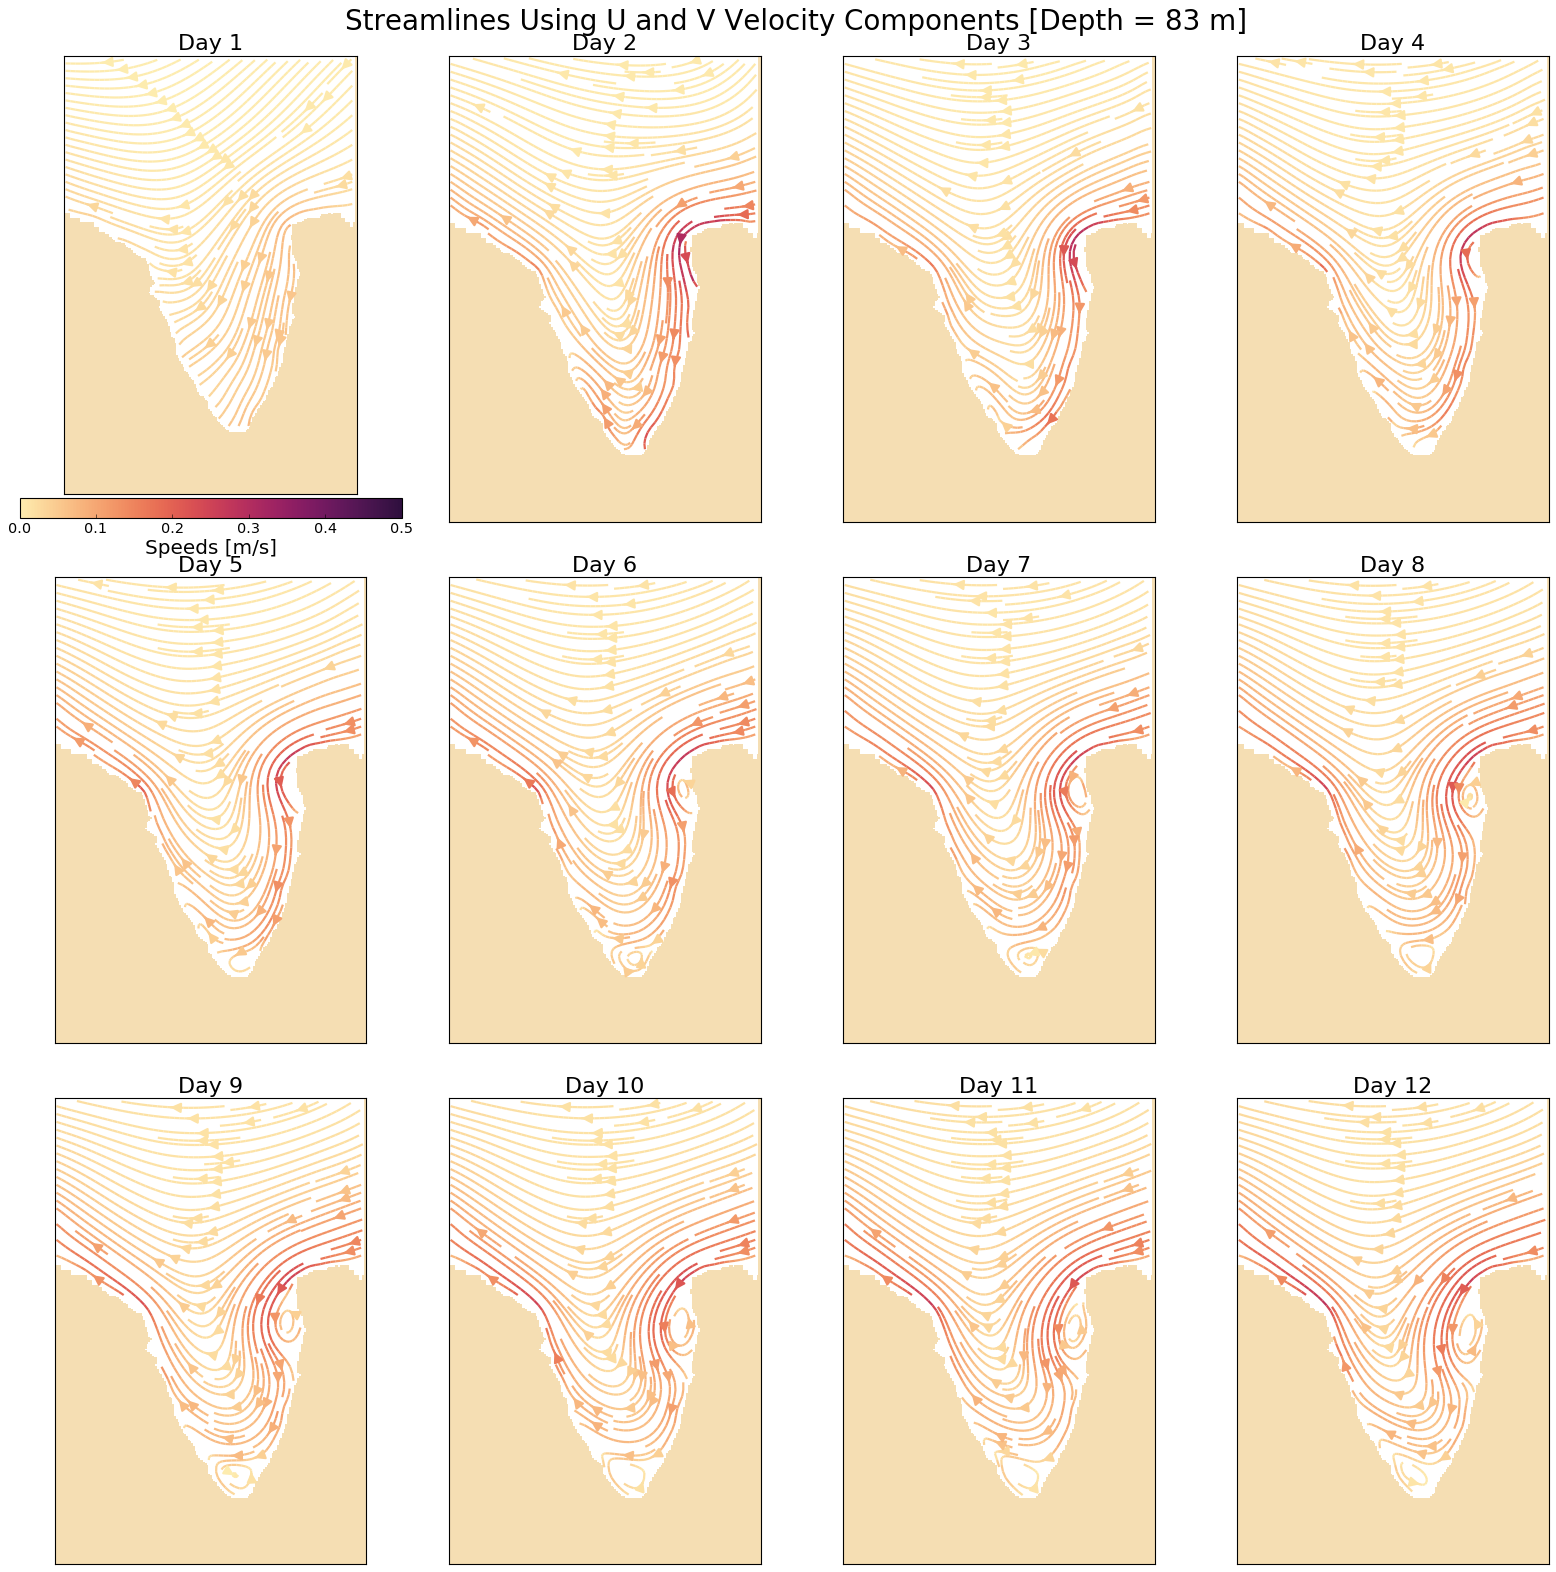

In [9]:
fig = quicklook.plot_speed_streamlines_depth(vozocrtx, vomecrty, umask, depthu, dep_ind, 0, 0.5)

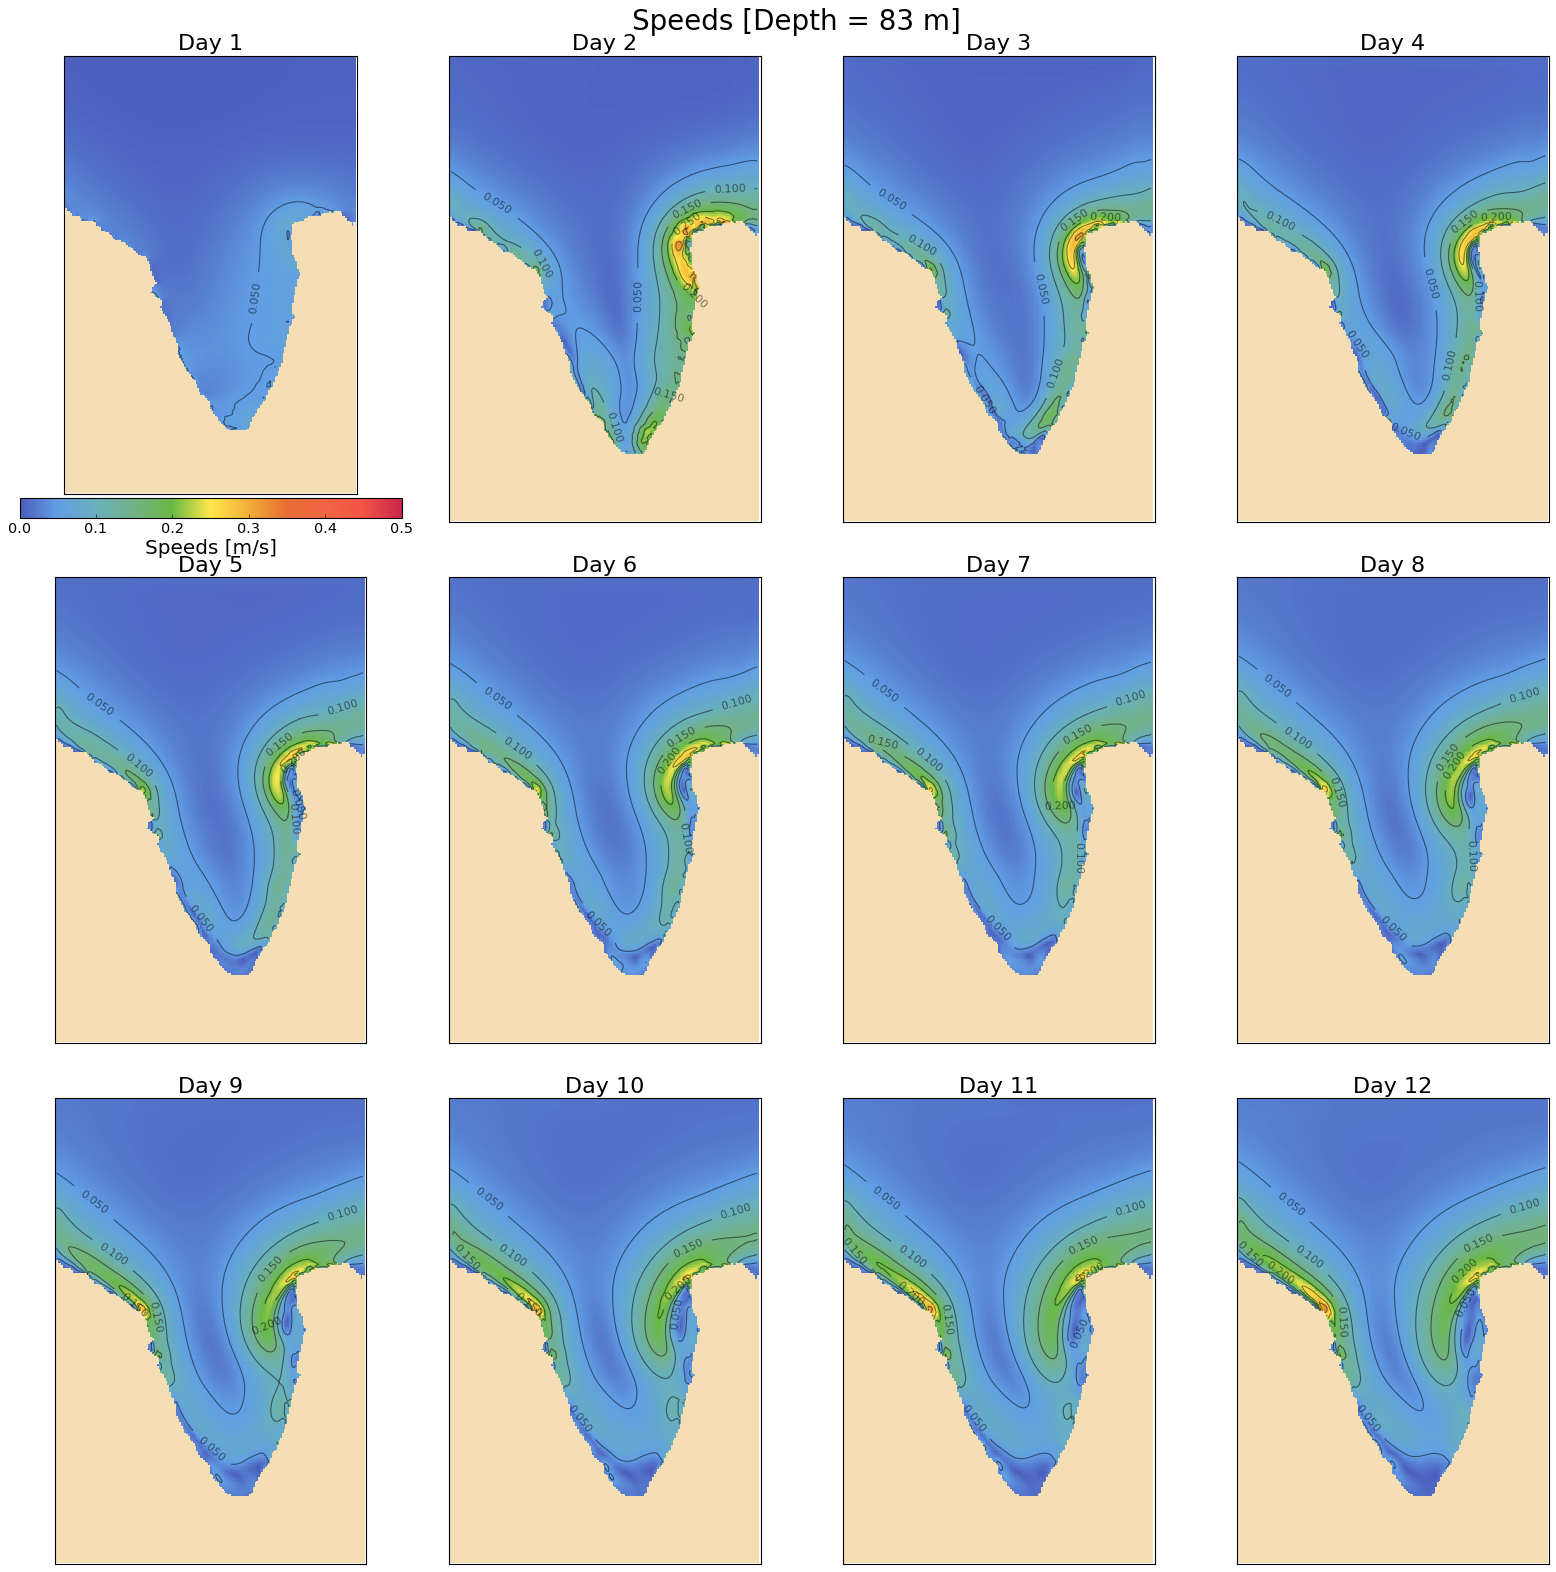

In [10]:
levels = np.arange(0, 0.55, 0.05)
fig = quicklook.plot_speed_pcolor_depth(vozocrtx, vomecrty, umask, depthu, dep_ind, 0, 0.5, levels)

In [11]:
salt_anom = vosaline - vosaline_orig

time_ind = 36
z_cut = dep_ind + 6

x_ind = 86
vosaline_cm, tmask_cm, deptht_cm = quicklook.get_sal_cross_mer(dirname, fname, x_ind, time_ind, z_cut)

y_ind = 68
vosaline_cz, tmask_cz, deptht_cz = quicklook.get_sal_cross_zon(dirname, fname, y_ind, time_ind, z_cut)

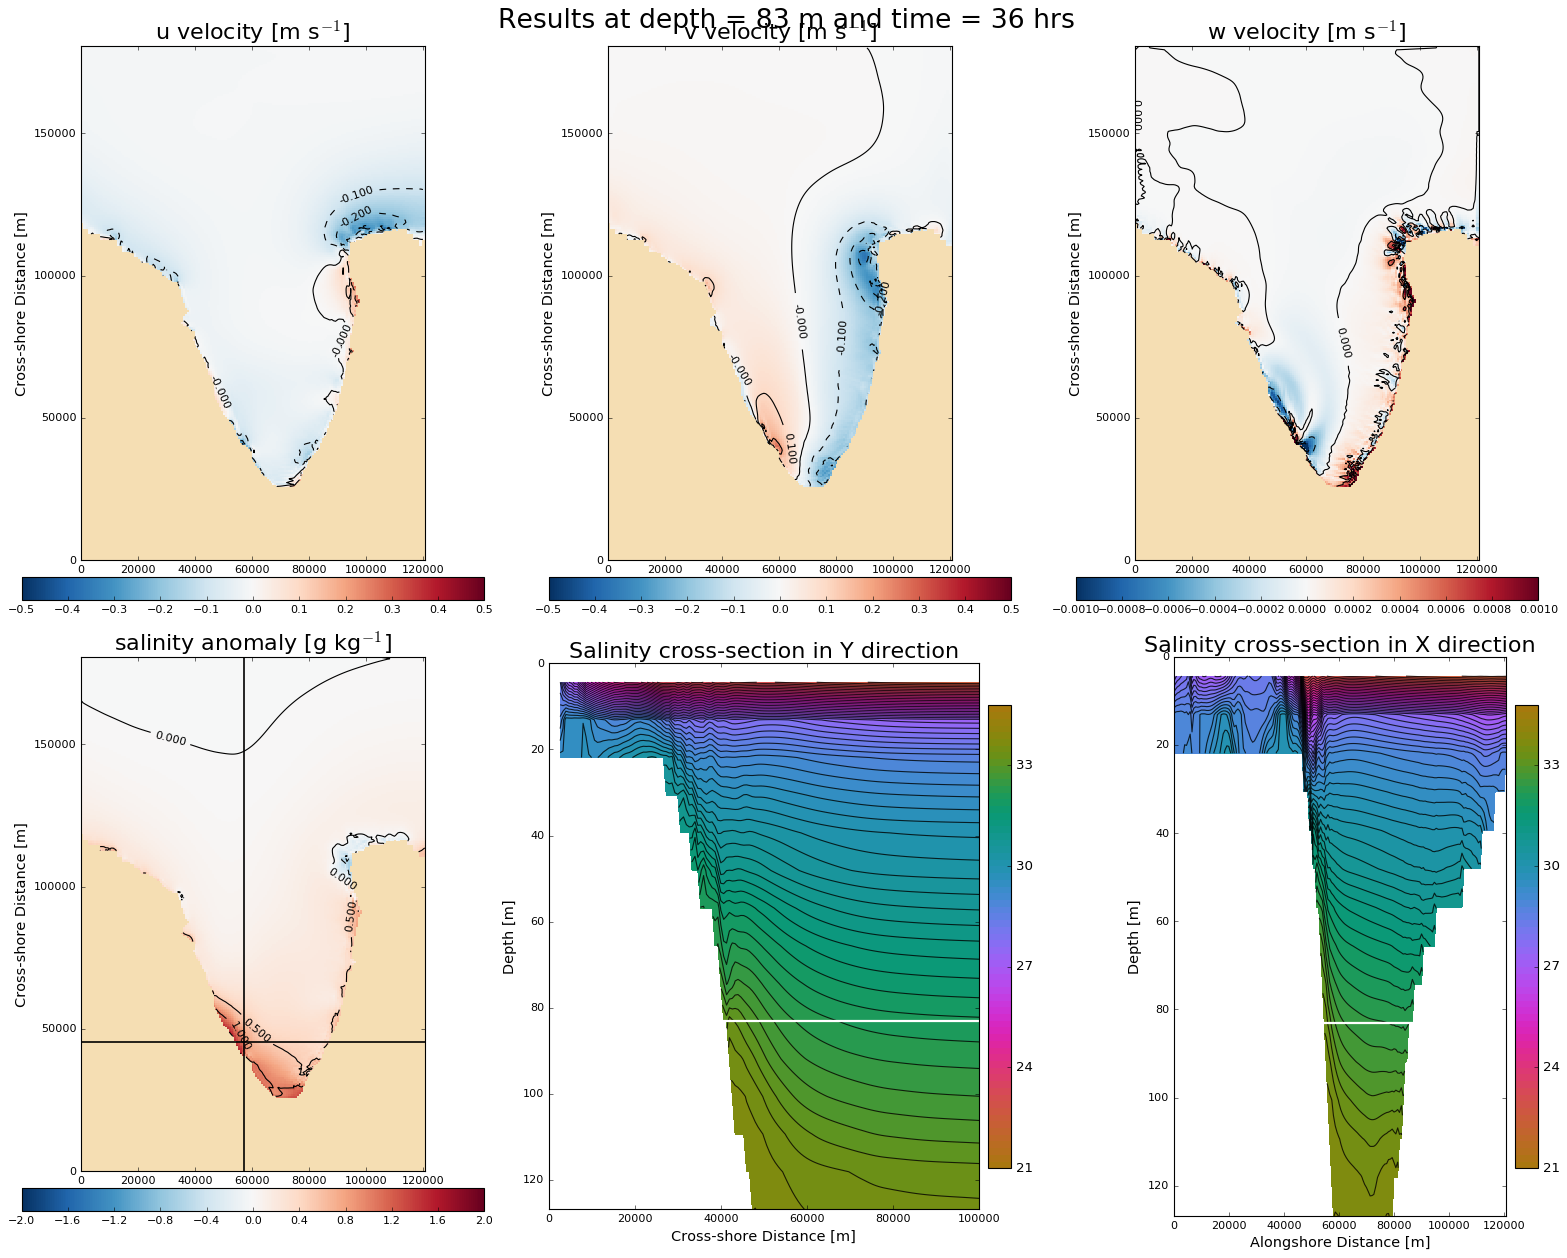

In [12]:
fig = quicklook.plot_vel_sal_story(time_ind, depthu, dep_ind, x_ind, y_ind, 
                                   vozocrtx, vomecrty, vovecrtz, salt_anom, vosaline_cm, vosaline_cz, deptht_cm, deptht_cz)

In [13]:
vovecrtz.min(), vovecrtz.max()

(-0.0034421154, 0.0029270849)